# Animated plots in Jupyter sessions served via the MyBinder.org system

For best results use the classic notebook interface and not JupyterLab.  This will default to that in that it opens in the classic interface and the code on this page works with that. (**ASIDE ABOUT JUPYTERLAB**: [Later update that I haven't yet explored: I have yet to pick through the approach outline here, in part because it is only an outline, but I'm noting it here for now until I compare it further with other solutions that work in JupyterLab. I like that it mentions fairly current JupyterLab and has some nice details.] While no suggestions [here](https://github.com/jupyterlab/jupyterlab/issues/2948) or [here](https://github.com/matplotlib/jupyter-matplotlib/issues/66) worked for JupyterLab, I have since found [the code here](https://stackoverflow.com/a/52672859/8508004) does indeed work for making an updating animation in JupyterLab and, in addition to the use of `.FuncAnimation()` in conjunction with making a playback controller widget, seems the closest to a 'universal' approach that I've found. See my use of the JupyterLab compatible methods, I've found [here](https://mybinder.org/v2/gh/fomightez/animated_matplotlib-binder/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgist.github.com%252Ffomightez%252Fe7e70099da1fea17b5e012d79f1d9d30%26urlpath%3D%2Flab%2Ftree%252Fe7e70099da1fea17b5e012d79f1d9d30%252Fjupyterlab_compatible_animation.ipynb). Those with `FuncAnimation()` with associated widget controller also **NOW WORK IN JUPYTERLAB, TOO.** That approach is related to [this discourse post by mgeier](https://discourse.jupyter.org/t/issues-with-binder-jupyterlab-and-showing-a-matplotlib-animation/4444/3?u=fomightez) that mentions an approach that works with both classic and JupyterLab, as well as in Binder. And offers links to code demos with another, streamlined variation on applying the `.to_jshtml()` settings in the notebook.) 

If you happend to be using this elsewhere and are in JupyterLab, you can switch back to the classic interface by changing the end of the url from `lab` to `tree`.

---- 

## My current approach

### basics

<IPython.core.display.Javascript object>


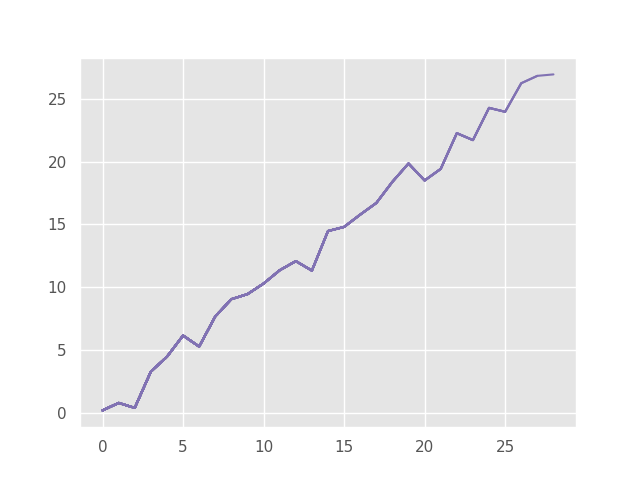

In [1]:
%matplotlib notebook
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns; sns.set() # as noted in comment for post at
# https://stackoverflow.com/q/47138271/8508004, this is the way now as
# just importing seaborn doesn't change the defaults for new versions.
import time

x = np.arange(30)
y = [float(x_i + np.random.randn(1)) for x_i in x]


plt.style.use('ggplot')

def makeplot(ax, indx):
    ax.plot(x[:indx], y[:indx], '-', c="m") #matplot has a short list of color, 'm' is for magenta
    fig.canvas.draw()


fig, ax = plt.subplots()

for indx,_ in enumerate(x):
    makeplot(ax, indx)
    time.sleep(0.2)

### Current approach refined

Make it less jumpy by controlling size of axis.

<IPython.core.display.Javascript object>


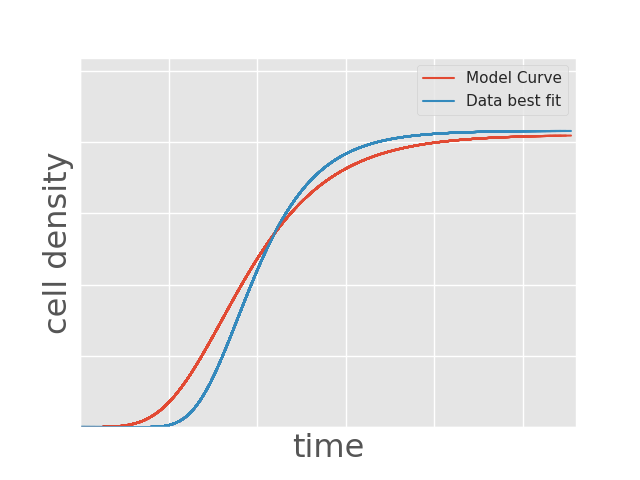

In [2]:
%matplotlib notebook

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns; sns.set() # as noted in comment for post at
# https://stackoverflow.com/q/47138271/8508004, this is the way now as
# just importing seaborn doesn't change the defaults for new versions.
import time

import warnings
warnings.filterwarnings('ignore')

# Let's create a function to model and create data
def gompertz_function(x, a,b,c):
    #a = upper asymptote
    #b = negative = x axis displacement
    #c = negative = growth rate
    return a*(np.exp(-b*(np.exp(-c*x))))

x_points = 100

# Generating clean data
x = np.linspace(0, 28, x_points)
y = gompertz_function(x, 4.1, 11.1, 0.3)

# Adding noise to the data
noise_f = 1.092
yn = y + noise_f * np.random.normal(size=len(x))



plt.style.use('ggplot')

def makeplot(ax, indx):
    # Plot out the current state of the data and model
    ax.plot(x[:indx], y[:indx], c="C0", label='Model Curve')
    #plt.scatter(x,yn, color='#34495e', alpha = 0.7, label='Noisy Curve')
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(0, max(y)+ noise_f) #plt.ylim(min(yn), max(yn))
    ax.set_xlabel("time",size = 23)
    ax.set_ylabel("cell density",size = 23)

    # Executing curve_fit on noisy data
    popt, pcov = curve_fit(gompertz_function, x, yn)
    ym = gompertz_function(x, *popt)
    plt.plot(x[:indx], ym[:indx], c='C1', label='Data best fit') 

    #cannot use `ax.legend(loc='best')` or repeats label every iteration;
    #legend not repeating and building based on https://stackoverflow.com/a/13589144/8508004
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')
    # hide actual numbers here since not really pertinent in demo
    ax.tick_params(labelbottom=False, labelleft=False) # hiding actual numbers based on https://stackoverflow.com/a/26428792/8508004


    fig.canvas.draw()


fig, ax = plt.subplots()

for indx,_ in enumerate(x):
    makeplot(ax, indx)
    time.sleep(0.2)

### Current approach applied for multiple plots (subplots)

(See [here](https://groups.google.com/d/msg/vpython-users/0Iig4CvvV0U/vaU9G0odAwAJ) for related post.)

Note that the main difference is the addition of ravel and the limit and label methods are slightly different. 

<IPython.core.display.Javascript object>


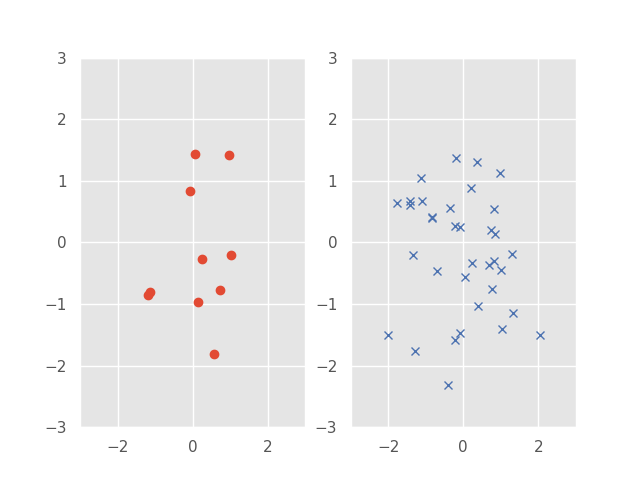

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time


plt.style.use('ggplot')

def makeplots(ax1, ax2):
    ax1.clear()
    ax1.set_xlim(-3,3)
    ax1.set_ylim(-3,3)
    x, y = np.random.normal(size=(2, 10))
    ax1.plot(x, y, 'o')

    ax2.clear()
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-3,3)
    i, j = np.random.normal(size=(2, 35))
    ax2.plot(i, j, 'x', c="b")

    fig.canvas.draw() 


fig, axes = plt.subplots(ncols=2, nrows=1)
ax1, ax2 = axes.ravel()


for f in range(10):
    makeplots(ax1, ax2)
    time.sleep(0.5)

-----

## Other options

This code sligthly modified from [here](https://stackoverflow.com/a/28077104/8508004) works.

```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
```

<IPython.core.display.Javascript object>


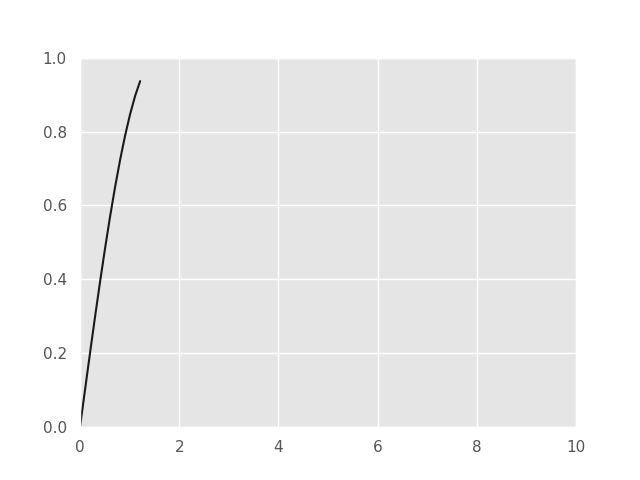

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True);

Press the blue botton in the upper left corner to stop it running at any time.

A more complex version from [this stackoverflow question](https://stackoverflow.com/a/74801084/8508004) using `animation.FuncAnimation()` works in sessions here if you run the following before that code.

```python
%pip install mplfinance
%pip install yfinance
```

As of now, I still prefer the simpler `%matplotlib notebook` as the first line in the cell over the suggesed `%matplotlib widget`.

----

There is also this resource below:  
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/  
I have a variant example of [that approach posted by Louis Tiao](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/) that I offer [here](https://nbviewer.org/gist/fomightez/e89bc19ec31d8ad1de1b8071c659e684) which will work in this session , or you can just click [here](https://mybinder.org/v2/gh/fomightez/animated_matplotlib-binder/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgist.github.com%252Ffomightez%252Fe89bc19ec31d8ad1de1b8071c659e684%26urlpath%3Dtree%252Fe89bc19ec31d8ad1de1b8071c659e684%252Flouistiao_example_in_actionJan_2023.ipynb) to launch a parallel session from the same environment with that notebook pulled up and ready to run. A have a more complex example using a similar approach in a separate notebook [here](https://nbviewer.org/gist/fomightez/d862333d8eefb94a74a79022840680b1) that runs in this current environment (click [here](https://mybinder.org/v2/gh/fomightez/animated_matplotlib-binder/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgist.github.com%252Ffomightez%252Fd862333d8eefb94a74a79022840680b1%26urlpath%3Dtree%252Fd862333d8eefb94a74a79022840680b1%252FCreating%20animated%20plot%20from%20frames%20that%20displays%20with%20control%20widget%20in%20Jupyter.ipynb) to pull that notebook into a parallel active session). Both example notebooks produce a full-featured, interactive widget that let's you control which frame of the animation is shown. Unlike the methods demonstrated above in this notebook that play through and don't let you 'pause' at specific points, with the widget controller **you can 'scrub' back and forth to chose points to highlight**. Importantly, **the animation remains playable when the notebook is viewed in a static render at nbviewer**, as [this static view of that notebook](https://nbviewer.org/gist/fomightez/d862333d8eefb94a74a79022840680b1) demonstrates; there is no need for actively running the notebook, unlike the animations produced by the cells above. (GitHub's notebook viewer does not presently support that; you must use [nbviewer](https://nbviewer.jupyter.org/). A variation on that process that produces the widget controller can also produce a portable HTML5 video animation file that can be embedded elsewhere. Indeed, a related [example here](https://stackoverflow.com/a/70764815/8508004) is set up to make such an HTML5 video and has a line that can be uncommented for saving a file version of the video. Making the HTML5 is also covered in [the post by Louis Tiao](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/). (Presently, ffmpeg is not installed and so trying to run [the current code](https://stackoverflow.com/a/70764815/8508004) in sessions here results in `RuntimeError: Requested MovieWriter (ffmpeg) not available`. The last three lines can be deleted and then the animation will be shown with no widget.  Alternatively, running in the active session `%conda install ffmpeg` and then restarting the kernel will allow that notebook to save a portable file version of the video.)  
In regards to running the animation with no widget, I also have made comments below a 'animation.FuncAnimation' example [describing how to run that answer code](https://stackoverflow.com/questions/75389311/plotting-a-live-graph-using-matplotlib#comment133024683_75389468) in this session or even in Spyder (using Qt).

Note if you are seeing evidence of overdrawing "causing thick lines and "blocky" texts" or "Distorted tick labels" when using `ArtistAnimation` aor `FuncAnimation`, see [here](https://stackoverflow.com/q/65654880/8508004).

Another approach is:  
[animatplot](https://animatplot.readthedocs.io/en/stable/gallery/Nuke.html)

[This notebook illustrates making interactive plots from frames of images](https://nbviewer.org/github/raphaelquast/jupyter_notebook_intro/blob/master/jupyter_nb_introduction.ipynb#pre-render-animations-and-export-to-HTML) and includes nice controller interface, launch it actively from [here](https://github.com/raphaelquast/jupyter_notebook_intro/tree/9f13098c4d71cb9ea71359c6f69c714aa2434b87) and then in the notebook 'jupyter_nb_introduction.ipynb' go to the section 'pre-render animations and export to HTML'. It looks(?) to use slightly different approaches, such as `anim.to_jshtml()`, than in the blog post by Parul Pandey (see below), and is similar to the one by Louis Tiao that I mentioned above. One nice feature is that [the notebook](https://nbviewer.org/github/raphaelquast/jupyter_notebook_intro/blob/master/jupyter_nb_introduction.ipynb#pre-render-animations-and-export-to-HTML) demonstrates the resulting frame-based animation works in static renderings on nbviewer; the animations shown above in this notebook need a running Python-backed kernel.

This blog post by Parul Pandey [here](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c) covers making animations with Matplotlib more for output as frames or videos/gifs but covers related topics and brings up the `Celluloid` module. There is a link to launch a binder session; unfortunately at this time the session doesn't seem to produce running notebooks as the dependencies aren't installed.

[This post on Twitter](https://twitter.com/MilesCranmer/status/1223215845377265665) by Miles Cranmer highlights that `camera.snap()` is what you want to use with `celluloid` every time you want to 're-do' the plot, in other words re-draw a frame, and includes an image of code.


I stumbled upon this example that seems to use bqplot and ipywidgets [here](https://stackoverflow.com/q/59314516/8508004). The person posting wasn't presently happy with the speed when served via myBinder.org, but it does work and I like the play and stop button and interactivity this approach offers.

I assisted in debugging an example animated bokeh plot that runs via mybinder [here](https://stackoverflow.com/questions/59610286/bokeh-interactive-plot-how-to-sum-multiply-two-or-more-values-from-sliders-t/59615745#59615745).

----

Enjoy.